In [3]:
%matplotlib inline
import cv2
import numpy as np

# Auxiliar Functions

In [257]:
def contrast_streching(img):
    
    img = img.astype('uint8')
    high = np.max(img)
    low = np.min(img)

    x = np.linspace(0,255,256);

    declive = 255./(high - low);
    ordenada = - declive * low;
    table = declive * x + ordenada;
    table[0:low] = 0;
    table[high:256] = 255;


    table = np.array([table.astype('uint8')])
    img_enchanted = cv2.LUT(img,table)
    return img_enchanted

In [171]:
def binarize_mean(img):
    
    mean = np.mean(img) - 10
    
    img_binarize = np.empty([img.shape[0], img.shape[1]])
                            
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] >= mean:
                img_binarize[i,j] = 1
            else:
                img_binarize[i,j] = 0
    return img_binarize  

In [550]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for x in xrange(0, image.shape[0], stepSize):
        for y in xrange(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[ y:y + windowSize[0],x:x + windowSize[1]])

In [5]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge((r,g,b)) # merge in rgb order to display with matplotlib

In [6]:
# power law tranformation
def power_law_lut(c, g):
    table = np.zeros(256,'uint8')

    table = np.array([( c * (i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    return np.array([table.astype('uint8')])

In [7]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

# FingerPrint Enchancement

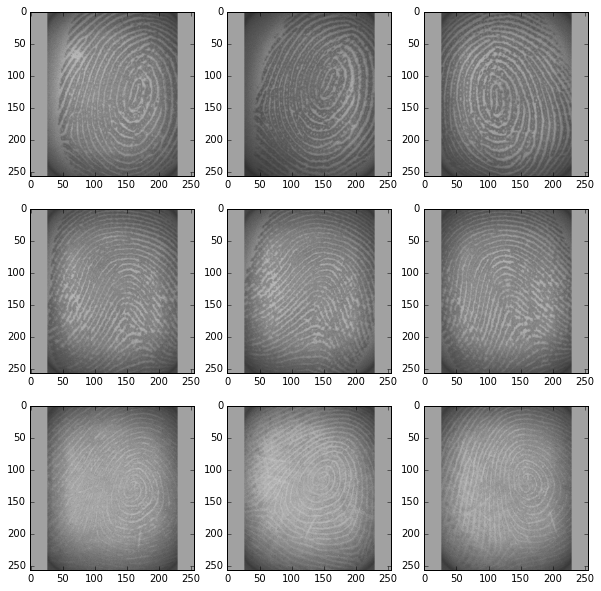

In [8]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img11 = cv2.imread('../fingerprintDB/#1/11.bmp')
img12 = cv2.imread('../fingerprintDB/#1/12.bmp')
img13 = cv2.imread('../fingerprintDB/#1/13.bmp')

img21 = cv2.imread('../fingerprintDB/#2/21.bmp')
img22 = cv2.imread('../fingerprintDB/#2/22.bmp')
img23 = cv2.imread('../fingerprintDB/#2/23.bmp')

img31 = cv2.imread('../fingerprintDB/#3/31.bmp')
img32 = cv2.imread('../fingerprintDB/#3/32.bmp')
img33 = cv2.imread('../fingerprintDB/#3/33.bmp')

plt.figure(figsize=(10,10)) 

plt.subplot(331)
plt.imshow(invertChannels(img11))
plt.subplot(332)
plt.imshow(invertChannels(img12))
plt.subplot(333)
plt.imshow(invertChannels(img13))

plt.subplot(334)
plt.imshow(invertChannels(img21))
plt.subplot(335)
plt.imshow(invertChannels(img22))
plt.subplot(336)
plt.imshow(invertChannels(img23))


plt.subplot(337)
plt.imshow(invertChannels(img31))
plt.subplot(338)
plt.imshow(invertChannels(img32))
plt.subplot(339)
plt.imshow(invertChannels(img33))

## crop around

In [9]:
def crop_around_center(image, width, height):
    """
    Given a NumPy / OpenCV 2 image, crops it to the given width and height,
    around it's centre point
    """

    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

    if(width > image_size[0]):
        width = image_size[0]

    if(height > image_size[1]):
        height = image_size[1]

    x1 = int(image_center[0] - width * 0.5)
    x2 = int(image_center[0] + width * 0.5)
    y1 = int(image_center[1] - height * 0.5)
    y2 = int(image_center[1] + height * 0.5)

    return image[y1:y2, x1:x2]

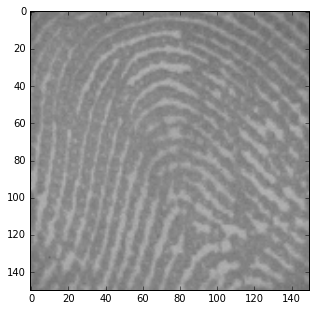

In [27]:
img21_cropped = crop_around_center(img23, 150 , 150)

plt.figure(figsize=(5,5)) 
plt.imshow(invertChannels(img21_cropped),cmap='Greys')

# Convert to grayscale

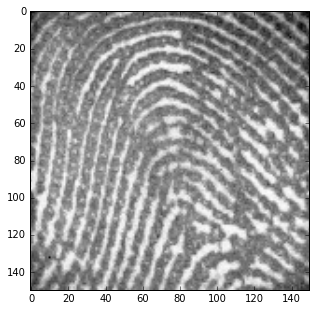

In [28]:
#skip
#convert to grayscale
b,g,r = cv2.split(img21_cropped)
img21_cropped_gray = img21_cropped[:,:,0]
#img21_cropped_gray = cv2.cvtColor(img21_cropped,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5,5)) 
plt.imshow(img21_cropped_gray,cmap='Greys_r')

# Pre-Processing

## Contrast Streching

(0, 256)

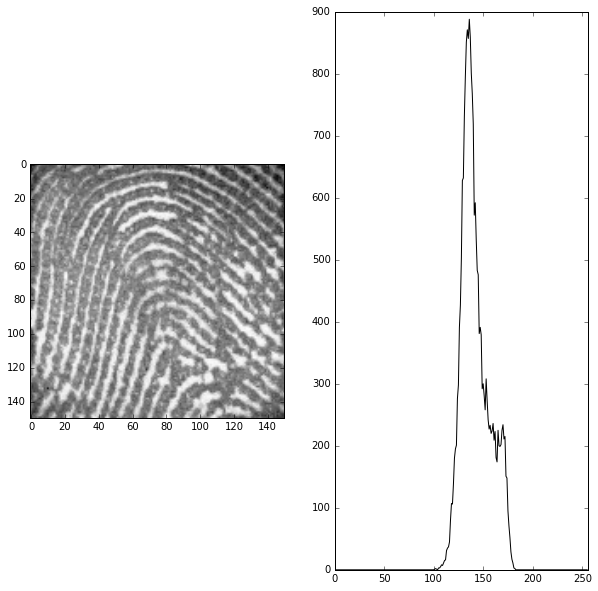

In [29]:
plt.figure(figsize=(10,10)) 

plt.subplot(121)
plt.imshow(img21_cropped_gray,cmap='Greys_r') 

plt.subplot(122)
histr = cv2.calcHist([img21_cropped_gray],[0],None,[256],[0,255])
plt.plot(histr,color = 'k')
plt.xlim([0,256]) 

(0, 256)

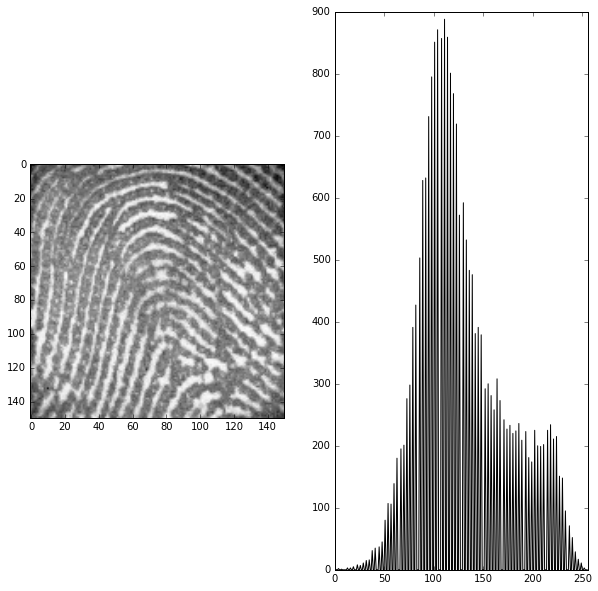

In [30]:
# build look up table
high = np.max(img21_cropped_gray)
low = np.min(img21_cropped_gray)

x = np.linspace(0,255,256);

declive = 255./(high - low);
ordenada = - declive * low;
table = declive * x + ordenada;
table[0:low] = 0;
table[high:256] = 255;
    

table = np.array([table.astype('uint8')])
img_pre1 = cv2.LUT(img21_cropped_gray,table)

plt.figure(figsize=(10,10)) 
plt.subplot(121)
plt.imshow(img_pre1,cmap='Greys_r')


plt.subplot(122)
histr = cv2.calcHist([img_pre1],[0],None,[256],[0,255])
plt.plot(histr,color = 'k')
plt.xlim([0,256]) 

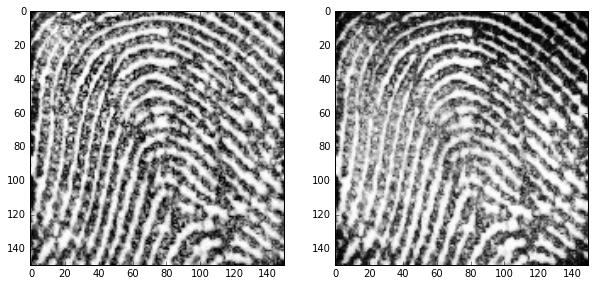

In [32]:
plt.figure(figsize=(10,10))
clahe = cv2.createCLAHE()


plt.subplot(121)
img_pre2 = clahe.apply(img_pre1)
plt.imshow(img_pre2,cmap='Greys_r')

plt.subplot(122)
img_pre2_test = cv2.equalizeHist(img_pre1)
plt.imshow(img_pre2_test,cmap='Greys_r')

In [35]:
# with overlap
def block_process_overlap(a, blocksize, overlap, filt, args):
    b = np.empty(a.shape)
    
    for row in range(0, a.shape[0] - overlap, blocksize - overlap ):
        for col in range(0, a.shape[1] - overlap, blocksize - overlap ):
            b[col:col + blocksize, row:row + blocksize] = (
                filt(a[col:col + blocksize, row:row + blocksize], *args))
    return b

In [36]:
def block_process(a, blocksize, filt, args):
    b = np.empty(a.shape)
    for row in xrange(0, a.shape[0], blocksize):
        for col in xrange(0, a.shape[1], blocksize):                            
            b[col:col + blocksize, row:row + blocksize] = (
                filt(a[col:col + blocksize, row:row + blocksize], *args))
    return b

(0, 256)

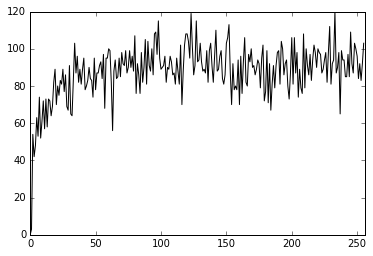

In [48]:
histr = cv2.calcHist([img_pre2],[0],None,[256],[0,255])
plt.plot(histr,color = 'k')
plt.xlim([0,256]) 

In [512]:
img_pre3[0:10,0:10]

array([[  0,   0,   0,   0,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0],
       [  0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255, 255,   0,   0,   0,   0,   0,   0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255]], dtype=uint8)

# FFT Enchancement

In [513]:
def filter_fft(block, k):        
    dft = cv2.dft(np.float32(block), flags = cv2.DFT_COMPLEX_OUTPUT)    
    #dft_tmp = dft * abs(dft)**k
    dft_tmp = dft * np.absolute(dft)**k    
    img_back = cv2.idft(dft_tmp)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])    
    return img_back

In [514]:
iench_fft_3 = filter_fft(img_pre2, 0.4)

iench_fft_2 = block_process_overlap(img_pre2, 30,15,filter_fft, (0.35,))
iench_fft_1 = block_process(img_pre2, 25, filter_fft, (0.35,))

iench_fft_1 *= 255.0/iench_fft_1.max()
iench_fft_1 = iench_fft_1.astype('uint8')

iench_fft_2 *= 255.0/iench_fft_2.max()
iench_fft_2 = iench_fft_2.astype('uint8')

#iench_fft_2[iench_fft_2 > 0] = 255

iench_fft_3 *= 255.0/iench_fft_3.max()
iench_fft_3 = iench_fft_3.astype('uint8')

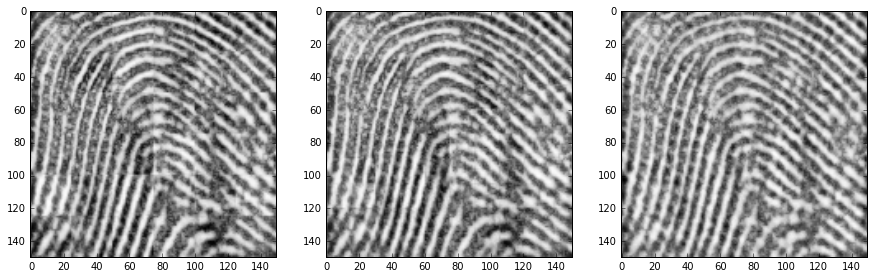

In [515]:
plt.figure(figsize=(15,15)) 
plt.subplot(131)
plt.imshow(iench_fft_1,cmap='Greys_r')
plt.subplot(132)
plt.imshow(iench_fft_2,cmap='Greys_r')
plt.subplot(133)
plt.imshow(iench_fft_3,cmap='Greys_r')

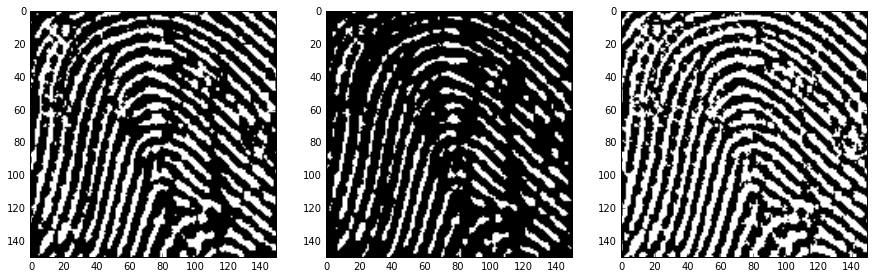

In [527]:
##############
# Corrigir o histograma bloco por block para calcular melhor o threshold

#itest = block_process(iench_fft_1, 25, contrast_streching, ())
#itest = block_process(iench_fft_3, 25, cv2.equalizeHist, ())
itest = cv2.equalizeHist(iench_fft_3)

####    
ret,iench_fft_bin_1 = cv2.threshold(iench_fft_3.astype('uint8'),215,255,cv2.THRESH_BINARY)

iench_fft_bin_2 = []
ret,iench_fft_bin_2 = cv2.threshold(iench_fft_3.astype('uint8'),225,255,cv2.THRESH_BINARY)

iench_fft_bin_3 = cv2.adaptiveThreshold(iench_fft_3.astype('uint8'),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,25,-1)

plt.figure(figsize=(15,15)) 
plt.subplot(131)
plt.imshow(iench_fft_bin_1,cmap='Greys_r')

plt.subplot(132)
plt.imshow(iench_fft_bin_2,cmap='Greys_r')

plt.subplot(133)
plt.imshow(iench_fft_bin_3,cmap='Greys_r')

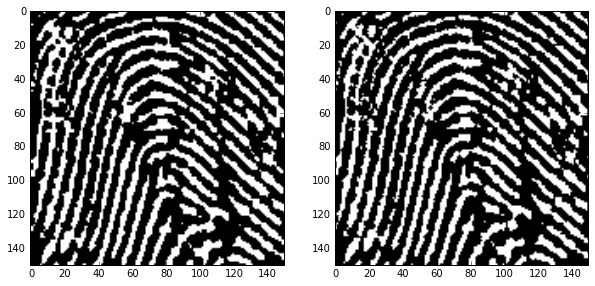

In [534]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
iench_fft_close = cv2.morphologyEx(iench_fft_bin_1, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(iench_fft_close ,cmap='Greys_r')

plt.subplot(122)
plt.imshow(iench_fft_bin_1,cmap='Greys_r')

# Fill Holes

# Thinning

In [545]:
iench_fft_close[0:10,0:10] / 255

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]], dtype=uint8)

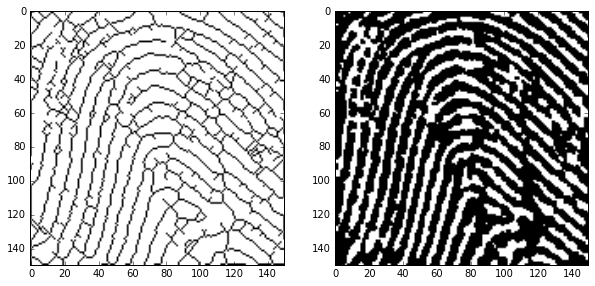

In [538]:
from skimage.morphology import medial_axis

img_thin = medial_axis(255 - iench_fft_close.copy())

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(255 - img_thin,cmap='Greys_r')
plt.subplot(122)
plt.imshow(iench_fft_close ,cmap='Greys_r')

In [542]:
-

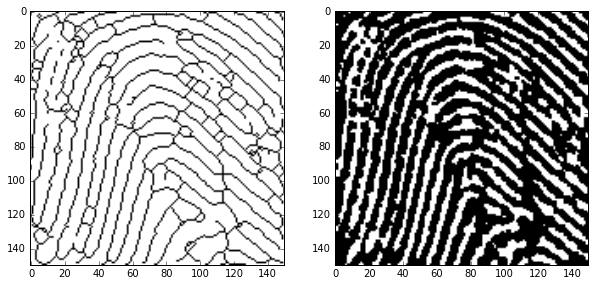

In [546]:
img_thin = bwmorph_thin(1 - iench_fft_close.copy() / 255,10)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(255 - img_thin,cmap='Greys_r')
plt.subplot(122)
plt.imshow(iench_fft_close ,cmap='Greys_r')

# Detect minuteas

In [551]:
counter = 0
clone = []
clone = 1 - img_thin * 1
clone = cv2.merge((clone, clone, clone))
clone[0:10,:10,1]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1]], dtype=int32)

48


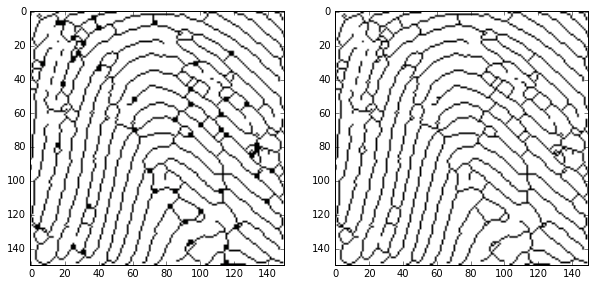

In [613]:
minuteas = []

clone = []
clone = 1 - img_thin * 1
clone = cv2.merge((clone, clone, clone))
bifurcations_counter = 0

# alterar o stepSize
for (x, y, window) in sliding_window(1 - img_thin * 1, stepSize=3, windowSize=(3, 3)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != 3 or window.shape[1] != 3:
        continue
    
    if (window[1,1] == 0) and (np.sum(window) <= 5):                   
        minuteas.append(np.array([x,y]))
        cv2.rectangle(clone, (x, y), (x + 2, y + 2), (0,255,0), 1)
        bifurcations_counter += 1
        
    
        
print bifurcations_counter

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(clone) 

plt.subplot(122)
plt.imshow(255 - img_thin, cmap = 'Greys_r')

# Get Features from Minuteas

In [614]:
minuteas[10][0]

30

In [615]:
prev_coord_x = 0
prev_coord_y = 0

for i in np.arange(len(minuteas)):
    if (i != len(minuteas) - 1):                          
        next_coord_x = minuteas[i][0]
        next_coord_y = minuteas[i][1]
        if (prev_coord_x != 0) and (prev_coord_y != 0):            
            # generate feature                                    
            a = next_coord_x - prev_coord_x           
            b = next_coord_y - prev_coord_y
            d_next = np.sqrt(a**2 + b**2)
            ang = np.degrees(np.arctan2(b,a))
            print "%s, %s, %0.1f, %0.2f" % (prev_coord_x, prev_coord_y, d_next, ang)                   
        prev_coord_x = next_coord_x
        prev_coord_y = next_coord_y

3, 126, 96.0, -88.21
6, 30, 25.6, -69.44
15, 6, 72.0, 90.00
15, 78, 72.1, -87.61
18, 6, 36.0, 90.00
18, 42, 27.7, -77.47
24, 15, 12.0, 90.00
24, 27, 111.0, 90.00
24, 138, 114.0, -88.49
27, 24, 6.7, -63.43
30, 18, 123.0, 90.00
30, 141, 27.2, -83.66
33, 114, 111.0, -88.45
36, 3, 6.7, 63.43
39, 9, 24.0, 90.00
39, 33, 27.7, 40.60
60, 51, 18.0, 90.00
60, 69, 25.6, 69.44
69, 93, 87.1, -88.03
72, 6, 99.0, 90.00
72, 105, 12.7, 45.00
81, 114, 51.1, -86.63
84, 63, 42.0, 90.00
84, 105, 19.0, 71.57
90, 123, 78.1, -87.80
93, 45, 9.0, 90.00
93, 54, 18.0, 90.00
93, 72, 63.0, 90.00
93, 135, 105.0, -88.36
96, 30, 36.1, 85.24
99, 66, 51.0, 90.00
99, 117, 58.2, -78.11
111, 60, 9.0, 90.00
111, 69, 36.0, 90.00
111, 105, 54.1, -86.82
114, 51, 21.0, 90.00
114, 72, 66.0, 90.00
114, 138, 9.0, 90.00
114, 147, 123.0, -88.60
117, 24, 102.0, 88.32
120, 126, 72.2, -85.24
126, 54, 30.1, 84.29
129, 84, 6.7, -63.43
132, 78, 3.0, 90.00
132, 81, 15.0, 90.00
132, 96, 16.2, 68.20


# Gabor filtering

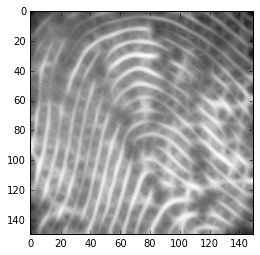

In [606]:
# TODO
#https://cvtuts.wordpress.com/2014/04/27/gabor-filters-a-practical-overview/

def build_filters():
    filters = []
    ksize = 12
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize),2.0, theta, 10.0, 0.6, 0, ktype=cv2.CV_32F)
        kern /= 1.5 * kern.sum()
        filters.append(kern)
    return filters
 
def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

filters = build_filters()
 
res1 = process(img21_cropped_gray, filters)
plt.imshow(res1,cmap='Greys_r')